# Arima Model Demo 

In [15]:
from pandas import read_csv
from pandas import datetime
import pandas as pd
from matplotlib import pyplot
 
def parser(x):
    return datetime.strptime('190'+x,'%Y-%m')
 
series = read_csv('C:\\Users\\jquin\\Desktop\\alto_horizonte\\Datos\\caldera_2016.csv',index_col='timestamp'
#                   ,index_col=0,
#                   date_parser=parser
                 )

In [ ]:
series.plot()
pyplot.show()

In [16]:
series = series.loc['2016-02':'2016-02'].dropna()
series = series['5']
# series.Month = [pd.to_datetime('190'+x+'-01') for x in series.Month.values]
# series.set_index(series.Month,inplace=True)
# series = series.drop(['Month'],axis=1)
print(series.head())
series.plot()
pyplot.show()

KeyError: '2016-02'

KeyboardInterrupt: 

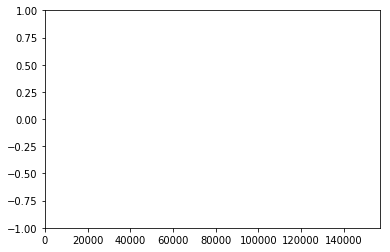

In [4]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

In [28]:
from statsmodels.tsa.arima_model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Mon, 04 Jun 2018   AIC                            406.340
Time:                                                 16:03:30   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


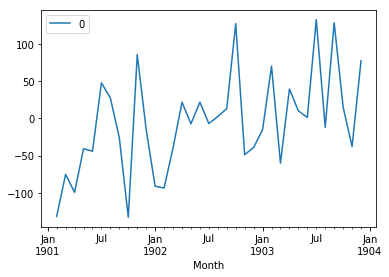

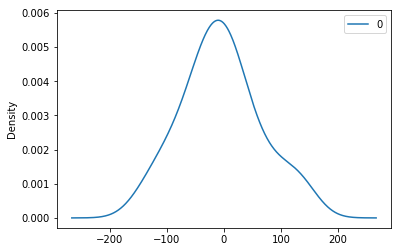

                0
count   35.000000
mean    -5.495219
std     68.132882
min   -133.296618
25%    -42.477906
50%     -7.186564
75%     24.748344
max    133.237976


In [30]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=349.117687, expected=342.300000
predicted=306.512943, expected=339.700000
predicted=387.376377, expected=440.400000
predicted=348.154171, expected=315.900000
predicted=386.308764, expected=439.300000
predicted=356.082043, expected=401.300000
predicted=446.379474, expected=437.400000
predicted=394.737326, expected=575.500000
predicted=434.915412, expected=407.600000
predicted=507.923418, expected=682.000000
predicted=435.483001, expected=475.300000
predicted=652.743789, expected=581.300000
predicted=546.343345, expected=646.900000
Test MSE: 6958.327


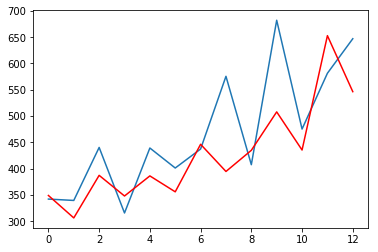

In [31]:
from sklearn.metrics import mean_squared_error
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# Arima Model Tunning Demo 

In [35]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
import warnings
warnings.filterwarnings("ignore")
# load dataset
# def parser(x):
# 	return datetime.strptime('190'+x, '%Y-%m')
# series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=52425.268
ARIMA(0, 0, 1) MSE=38145.154
ARIMA(0, 0, 2) MSE=23989.649
ARIMA(0, 1, 0) MSE=18003.173
ARIMA(0, 1, 1) MSE=9558.305
ARIMA(0, 2, 0) MSE=67339.808
ARIMA(0, 2, 1) MSE=18322.844
ARIMA(1, 0, 0) MSE=23113.106
ARIMA(1, 1, 0) MSE=7121.370
ARIMA(1, 1, 1) MSE=7003.679
ARIMA(1, 2, 0) MSE=18608.009
ARIMA(2, 1, 0) MSE=5689.929
ARIMA(2, 1, 1) MSE=7759.705
ARIMA(2, 2, 0) MSE=9860.949
ARIMA(4, 1, 0) MSE=6649.593
ARIMA(4, 1, 1) MSE=6796.307
ARIMA(4, 2, 0) MSE=7596.333
ARIMA(4, 2, 1) MSE=4694.874
ARIMA(6, 1, 0) MSE=6810.072
ARIMA(6, 2, 0) MSE=6261.086
ARIMA(8, 1, 0) MSE=6579.921
Best ARIMA(4, 2, 1) MSE=4694.874


predicted=383.126889, expected=342.300000
predicted=264.577223, expected=339.700000
predicted=342.184337, expected=440.400000
predicted=467.543335, expected=315.900000
predicted=403.217306, expected=439.300000
predicted=369.048305, expected=401.300000
predicted=464.838215, expected=437.400000
predicted=451.653255, expected=575.500000
predicted=581.620042, expected=407.600000
predicted=565.067196, expected=682.000000
predicted=556.085839, expected=475.300000
predicted=676.513713, expected=581.300000
predicted=545.614946, expected=646.900000
Test MSE: 9860.939


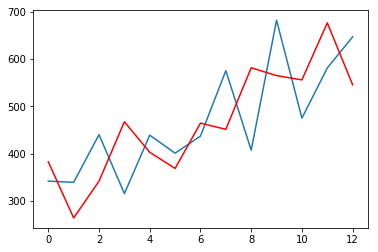

In [36]:
from sklearn.metrics import mean_squared_error
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(2,2,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()